## Introduction:
 
This document contains instructions for conducting a series of data manipulation and analysis steps that represent processes encountered on a regular basis in the impact evaluation analysis.
 
## Background on exercise:
 
This exercise represents a simplified load impact evaluation of a demand response program implemented under a randomized controlled trial (RCT) experimental design. This program incentivizes some utility customers to reduce their electricity demand during peak hours on hot days (“event days”) by raising the price of electricity during those hours. The following exercise involves compiling data from separate sources into a master data set, cleaning and validating the data. As part of the validation process, summary statistics will be calculated and reported, and the data will be visualized.  Treatment and control group data must be validated to not have statistically significant differences on event-like non-event days (“proxy days”) to validate the randomization process (internal validity) of the experiment. Then, the difference in electricity use between the treatment and control groups must be calculated on the event days to estimate the load impact (demand reduction). In this simplified example, we will assume a simple differencing of the data is sufficient for impact calculations and difference in differences calculations are not needed.
 
## Original data:
- Customer hourly electricity usage (interval data)
  - 3 files (Organized by customer by day. Ex: kW1= electricity consumption in first hour of the day)
- Customer characteristics
 + 1 file (1=treatment group, 0=control group)
- Event and proxy day data
 + 1 file
 
Event period: 2 PM – 6 PM. Note: this is kW15 - kW18 and hour 15 – 18 in the data
 
For audience from a non-technical background.
 


## Step 1: merging data (done in Power Query) 
1. Combine all original data to create a master dataset. Some cleaning may be necessary at this step. The outcome of this step will be a single master data file. The detailed steps are listed below:
 1. Append the 3 customer interval datasets together
 2. Merge the combined/appended interval data file with the customer  characteristics file
 3. Merge the event and proxy data with the combined interval data and customer characteristics file
 
 ### Issue discovered in this step
 When merging the Interval Data dataset and Event/Proxy Day dataset, I found that the “date” columns have different data types: “date & hour” in Interval Data, “date” in Event/Proxy Day dataset. To solve this, I synchronized the type of data to “date’ type and merged two datasets. 
 

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
plt.close("all")

/kaggle/input/ri-test/Master data file.csv


## Step 2: Data cleaning and validation
 1. Perform basic data cleaning and validation checks. Check for the following:
  - Duplicates
  - Missing values
  - Outliers
 2. Document all data issues


In [2]:
#Import the merged dataset
data = pd.read_csv('/kaggle/input/ri-test/Master data file.csv')
data.head()

,date,customer_id,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,...,kw20,kw21,kw22,kw23,kw24,obs,treatment,Customer Characteristics.customer_id,Events and Proxy Days.event_day,Events and Proxy Days.proxy_day
0,8/30/2017,4.0,0.421878,0.391057,0.697558,0.745793,0.591222,0.464849,1.379117,1.377710,...,6.980206,3.504141,1.902951,2.131377,1.154995,17.0,0.0,4.0,1.0,0.0
1,8/30/2017,13.0,0.930054,1.199772,0.124829,0.663357,0.362364,0.259349,0.505622,0.632251,...,1.071498,0.659677,0.931382,1.009175,0.717402,17.0,0.0,13.0,1.0,0.0
2,8/30/2017,26.0,1.519272,0.503459,0.486698,0.595338,0.818720,0.534207,1.312676,1.032711,...,1.875443,1.297382,1.172828,1.720406,2.803832,17.0,0.0,26.0,1.0,0.0
3,8/28/2017,4.0,0.946971,0.849843,0.952280,0.867926,0.786561,0.398582,0.434940,0.950535,...,4.319295,2.923137,1.441674,1.298640,1.300995,17.0,0.0,4.0,1.0,0.0
4,8/28/2017,13.0,0.244519,0.455644,0.492013,0.282580,0.286353,0.167478,1.126074,0.625812,...,0.280929,0.342930,0.885010,0.468562,0.875257,17.0,0.0,13.0,1.0,0.0


### Drop missing value

In [3]:
#drop all missing values
df= data.dropna() 

#Make sure the missing values are dropped
df.isna()

,date,customer_id,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,...,kw20,kw21,kw22,kw23,kw24,obs,treatment,Customer Characteristics.customer_id,Events and Proxy Days.event_day,Events and Proxy Days.proxy_day
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16587,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16590,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16591,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Detect & remove outliers 

Outliers are identified and eliminated in Python. 128 outlier records are found among customers with abnormally high electricity demand. I think that these customers could be big commercial establishments, e.g., shopping malls, and that their behaviors are not price-sensitive. Including outliers would severely bias the result magnitude-wise. 

In [4]:
#Identify the outliers using Zscore
col=['kw1','kw2','kw3','kw4','kw5','kw6','kw7','kw8','kw9','kw10','kw11','kw12','kw13','kw14','kw15','kw16','kw17','kw18','kw19','kw20','kw21','kw22','kw23','kw24']
from scipy import stats
outlier=df[(np.abs(stats.zscore(df[col]))>3).all(axis=1)]
df.describe()

outlier.describe()
#The minimum outlier electricity usage is much higher companring to the 75 percentile of the raw dataset.

#Remove outliers using Z-score
df=df[(np.abs(stats.zscore(df[col])) < 3).all(axis=1)]
#Number of outliers
print(14618-14490)


128


### Find duplicates
Duplicates are all in control group. Including the duplicates may lead to the false conclusion regarding the impact (upward bias). 
 


In [5]:
a=df.duplicated()
df['duplicate']=a
dup=df[df['duplicate']==True]
dup


,date,customer_id,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,...,kw21,kw22,kw23,kw24,obs,treatment,Customer Characteristics.customer_id,Events and Proxy Days.event_day,Events and Proxy Days.proxy_day,duplicate
16581,7/10/2017,537.0,1.257235,0.780834,0.683720,1.341019,0.780020,1.319747,0.582926,1.073211,...,1.726862,0.870990,0.728709,0.875631,17.0,0.0,537.0,0.0,1.0,True
16582,7/7/2017,537.0,0.611946,1.133382,1.335708,0.935780,0.621024,1.227500,0.398467,1.121254,...,2.472706,1.543151,1.206982,0.954630,17.0,0.0,537.0,1.0,0.0,True
16583,7/6/2017,537.0,0.844525,0.906608,0.529485,0.556184,1.036929,0.809029,1.317587,0.182341,...,1.262698,1.638205,0.815562,0.450662,17.0,0.0,537.0,1.0,0.0,True
16584,7/17/2017,537.0,0.888934,0.984481,1.047838,1.347119,1.015407,0.895796,0.597812,1.292828,...,1.386157,0.765488,0.731457,0.674856,17.0,0.0,537.0,0.0,1.0,True
16586,7/5/2017,537.0,0.933053,0.476952,0.682045,0.797217,0.499326,1.287049,0.974918,0.575717,...,1.168815,1.317059,0.720218,1.006809,17.0,0.0,537.0,0.0,1.0,True
16587,7/10/2017,554.0,0.989085,1.124060,0.413396,0.548293,0.417268,0.773197,0.965287,0.705483,...,1.293732,1.114754,0.435019,0.139187,17.0,0.0,554.0,0.0,1.0,True
16588,7/17/2017,554.0,0.690973,0.811362,0.929961,0.754723,0.458178,0.648468,0.693719,0.868608,...,1.243153,1.172165,0.480182,1.062135,17.0,0.0,554.0,0.0,1.0,True
16590,7/7/2017,554.0,0.743086,1.088667,0.870166,0.300622,0.406392,0.912006,1.025133,2.307637,...,0.376940,0.555082,0.857465,0.284102,17.0,0.0,554.0,1.0,0.0,True
16591,7/6/2017,554.0,0.432723,0.619231,0.710607,0.914294,0.157627,0.329467,0.908624,0.588281,...,0.363210,0.884283,0.908562,0.523181,17.0,0.0,554.0,1.0,0.0,True
16592,7/5/2017,554.0,0.691436,0.900868,0.519753,0.272500,0.445110,0.850959,0.520807,1.110923,...,0.250593,1.328691,0.517904,0.562157,17.0,0.0,554.0,0.0,1.0,True


## Step 3: Calculate summary statistics 
Generate a table to report findings; format this table as you would in a final report

The following metrics should be calculated and reported for treatment and control customers
- Customer count
- Total number of observations
- Mean, and standard deviation of hourly electricity usage on proxy days during the event period


In [6]:
#Save a dataset "cd" with all 24 hours electricity usage
df= df.drop_duplicates()
cd=df
df.to_csv('clean_data.csv', index=False)

In [7]:
# create a dataset df that only contains the event period electricity usage 
df= df.drop(['kw1','kw2','kw3','kw4','kw5','kw6','kw7','kw8','kw9','kw10','kw11','kw12','kw13','kw14','kw19','kw20','kw21','kw22','kw23','kw24'], axis=1)
#Select event period hours
col= ['kw15','kw16','kw17','kw18']
#Create variable average hourly electricty usage = (kw15 + kw16 + kw17 + kw18)/4
df['average']=df[col].mean(axis=1) 

df.to_csv('event_data.csv', index=False)

In [8]:
TM=df[df["treatment"]>0]
CT=df[df["treatment"]<1]
#head counts = length, treatment=427, control=478, the data is balanced.
heads=[TM['customer_id'].value_counts(), CT['customer_id'].value_counts()]
print(heads)
#observations: treatment=6832, control=7658
obs=[TM.shape,CT.shape]
print(obs)

[16316.0    16
33111.0    16
71976.0    16
39458.0    16
31474.0    16
           ..
15924.0    16
70323.0    16
51840.0    16
12451.0    16
51244.0    16
Name: customer_id, Length: 427, dtype: int64, 537.0      21
554.0      21
4.0        16
27251.0    16
69840.0    16
           ..
9830.0     16
9695.0     16
9433.0     16
54850.0    16
33085.0    16
Name: customer_id, Length: 478, dtype: int64]
[(6832, 13), (7658, 13)]


In [9]:
#3.	Mean, and standard deviation of hourly electricity usage on proxy days during the event period
#treatment group
tm_px=TM[TM['Events and Proxy Days.proxy_day']>0]
print(tm_px['average'].mean(),tm_px['average'].std())
#control group 
ct_px=CT[CT['Events and Proxy Days.proxy_day']>0]
print(ct_px['average'].mean(),ct_px['average'].std())

3.3474543982740967 1.7634681449628575
3.2263821086458733 1.8405798097184658


||Treatment|Control|
|--|-----|---|
|Customer counts|427|478|
|Observations|6832|7648|
|Mean|3.35|3.23|
|Standard Deviation|1.76|1.84|

## Step 4: T-test
Conduct a statistical T-test on the mean event period hourly usage data between treatment and control group on proxy days.


In [10]:
from scipy.stats import ttest_ind
#Conduct a statistical T-test on the mean event period hourly usage data between treatment and control group on proxy days.
tm_px_hu=tm_px["average"]
ct_px_hu=ct_px["average"]
ttest_ind(tm_px_hu, ct_px_hu)

Ttest_indResult(statistic=2.469138251789255, pvalue=0.013574414112494059)


T-test result has a P value 0.01457. This indicates that we are at least 99.8% confident about the treatment and control group equivalence on the proxy days, which validates the randomization process of the experiment.

## Graphs for Proxy and Event days



In [11]:
#Create two datasets: proxy days & event days
px=cd[cd['Events and Proxy Days.proxy_day']>0]
ev=cd[cd['Events and Proxy Days.proxy_day']<1]

Text(0.5, 1.0, 'Average proxy day')

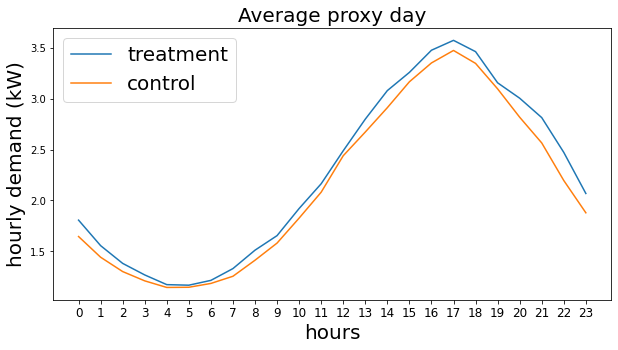

In [12]:
#select columns needed for the graphs
graph=['treatment','kw1','kw2','kw3','kw4','kw5','kw6','kw7','kw8','kw9','kw10','kw11','kw12','kw13','kw14','kw15','kw16','kw17','kw18','kw19','kw20','kw21','kw22','kw23','kw24']
px=px[graph]
ev=ev[graph]
#proxy day treatment data
px_tm = px[px['treatment']>0].describe()[1:2]
#proxy day control data
px_ct= px[px['treatment']<1].describe()[1:2]
#Append proxy day treatment data and proxy day control data
PX = px_tm.append(px_ct)
PX.index=['treatment','control']

#Proxy day graph
PX=PX.drop(columns='treatment')
PX=PX.transpose()
import matplotlib.pyplot as plt
plt.close("all")
labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
ax=PX.plot(figsize=(10,5))
ax.set_xticks(range(len(PX)))
ax.set_xticklabels(labels, rotation=0,fontsize=12)
plt.xlabel("hours", fontsize=20)
plt.ylabel("hourly demand (kW)", fontsize=20)
ax.legend(fontsize=20)
ax.set_title('Average proxy day', fontsize=20)



Text(0.5, 1.0, 'Average event day')

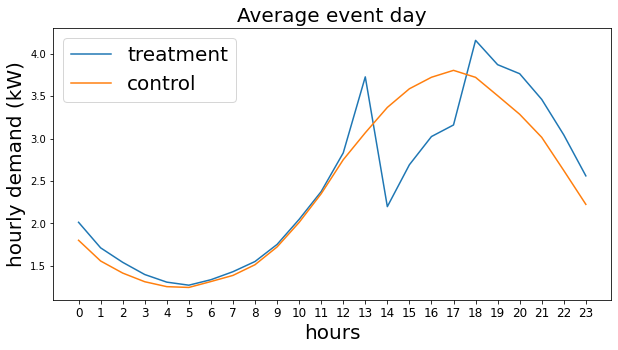

In [13]:
#Event day graph
ev_tm = ev[ev['treatment']>0].describe()[1:2]
ev_ct= ev[ev['treatment']<1].describe()[1:2]

EV = ev_tm.append(ev_ct)

EV.index=['treatment','control']

EV=EV.drop(columns='treatment')
EV=EV.transpose()

labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
ax=EV.plot(figsize=(10,5))
ax.set_xticks(range(len(EV)))
ax.set_xticklabels(labels, rotation=0,fontsize=12)
plt.xlabel("hours", fontsize=20)
plt.ylabel("hourly demand (kW)", fontsize=20)
ax.legend(fontsize=20)
ax.set_title('Average event day', fontsize=20)

## Step 5: cauculate load impact


In [14]:
#calculate the load impact
#event period on event days

ev=df[df['Events and Proxy Days.proxy_day']<1]
ev_tm = ev[ev['treatment']>0].describe()[1:2]
ev_ct= ev[ev['treatment']<1].describe()[1:2]

EV = ev_tm.append(ev_ct)

EV.index=['treatment','control']

EV=EV.drop(columns='treatment')
EV=EV.transpose()
EV['dif']= EV['treatment']- EV['control']
EV['dif%'] = EV['dif']/EV['control']
#hourly usage impact and percent impact
EV


,treatment,control,dif,dif%
customer_id,33038.444965,26701.591137,6336.853828,0.237321
kw15,2.197073,3.366724,-1.169651,-0.347415
kw16,2.690741,3.586566,-0.895825,-0.249772
kw17,3.023348,3.722191,-0.698843,-0.187751
kw18,3.159783,3.803636,-0.643853,-0.169273
obs,17.000000,17.000000,0.000000,0.000000
Customer Characteristics.customer_id,33038.444965,26701.591137,6336.853828,0.237321
Events and Proxy Days.event_day,1.000000,1.000000,0.000000,0.000000
Events and Proxy Days.proxy_day,0.000000,0.000000,0.000000,NaN
average,2.767736,3.619780,-0.852043,-0.235385


In [15]:
ev_t=ev[ev['treatment']>0]
#customer count
ev_t['customer_id'].value_counts()

16316.0    10
33111.0    10
71976.0    10
39458.0    10
31474.0    10
           ..
15924.0    10
70323.0    10
51840.0    10
12451.0    10
51244.0    10
Name: customer_id, Length: 427, dtype: int64

In [16]:
ev_c=ev[ev['treatment']<1]
ev_c['customer_id'].value_counts()

537.0      12
554.0      12
4.0        10
27251.0    10
69840.0    10
           ..
9830.0     10
9695.0     10
9433.0     10
54850.0    10
33085.0    10
Name: customer_id, Length: 478, dtype: int64

In [17]:
#aggregated control group usage
print(sum(ev_c[col].sum()))
#aggregated treatment group usage
print(sum(ev_t[col].sum()))
#aggregated saving kwh
print(sum(ev_c[col].sum()-ev_t[col].sum()))

# % saving comparing to control group
sum(ev_c[col].sum()-ev_t[col].sum())/sum(ev_c[col].sum())

69268.101669522
47272.93764796801
21995.164021554003


0.3175366942563677

In [18]:
#average usage per customer during event period durign event days
#treatment group usage per customer
print(47272.94/427)
#control group usage per customer
print(69212.1/478)
#impact per customer
print(144.79-110.71)
#percentage impact per customer
print(34.2/144.91)

110.70946135831382
144.79518828451884
34.08
0.2360085570354013


|Unit: kW|Treatment|Control|Impact|Percent impact|
|---|----|---|----|--|
|Customer count|427|478|-|-|
|Aggregate usage|47272.94|69212.10|21939.14|31.7%|
|Usage per customer| 110.71|144.80|34.08|23.6%|

The result table suggests that the average treatment group customer experiences 23.6% energy saving compared to the control group, about 34.08 kW saving per customer. At aggregate level, raising electricity prices during peak hour brings 31.7% energy saving, about 21939.14 kW total. 